# Kickstarter allows individuals with an idea to recieve backing before commiting resources to following through with the project.

With this EDA, I will be looking into what truly makes a Kickstarter project successful. Let's say that we want to start our own company, but don't know where to start. We have yet to come up with an idea and a bunch of other factors. We have luckily recieved a dataset of what has led to a project's successful or failure.

With this, we are going to look through and see what factors contribute most significantly to ones upbringing or downfall. Based on this data, we will then move onto the next steps of launching our project. Our goal is to obviously have a succesful project backing, so what exactly will lead us to the greatest chance of this happening?

Hypothesis: I believe that country, pledge amount needed, and the category will play a significant role. Less developed countries will have a lower chance of recieving backing because they, unfortunately, won't be as credible and have less resources.

In additon, pledge amount is critical. The higher it is, the more ambitious the project is. The backers need to be able to afford it and see some value in it. Lastly, the category is probably the greatest factor. Categories like technology will have a higher chance of backing rather than music or dance.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as datetime
%matplotlib inline

In [2]:
kstart = pd.read_csv("ks-projects-201801.csv")

In [3]:
kstart.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Lots of columns. We don't need some of them, like ID, name, currency, pledged, backers, usdpledged_real, and usd_goal_real

In [4]:
colsdrop = ["ID", "name", "currency", "pledged", "backers", "usd pledged", "usd_pledged_real", "usd_goal_real"]
kstart = kstart.drop(colsdrop, axis=1)

In [5]:
kstart.head()

,category,main_category,deadline,goal,launched,state,country
0,Poetry,Publishing,2015-10-09,1000.0,2015-08-11 12:12:28,failed,GB
1,Narrative Film,Film & Video,2017-11-01,30000.0,2017-09-02 04:43:57,failed,US
2,Narrative Film,Film & Video,2013-02-26,45000.0,2013-01-12 00:20:50,failed,US
3,Music,Music,2012-04-16,5000.0,2012-03-17 03:24:11,failed,US
4,Film & Video,Film & Video,2015-08-29,19500.0,2015-07-04 08:35:03,canceled,US


In [6]:
kstart.deadline = pd.to_datetime(kstart.deadline)
kstart.launched = pd.to_datetime(kstart.launched)
kstart['Length'] = (kstart['deadline'] - kstart['launched']).dt.days
kstart = kstart.drop(["deadline", "launched"], axis =1)

In [7]:
kstart

,category,main_category,goal,state,country,Length
0,Poetry,Publishing,1000.0,failed,GB,58
1,Narrative Film,Film & Video,30000.0,failed,US,59
2,Narrative Film,Film & Video,45000.0,failed,US,44
3,Music,Music,5000.0,failed,US,29
4,Film & Video,Film & Video,19500.0,canceled,US,55
5,Restaurants,Food,50000.0,successful,US,34
6,Food,Food,1000.0,successful,US,19
7,Drinks,Food,25000.0,failed,US,44
8,Product Design,Design,125000.0,canceled,US,34
9,Documentary,Film & Video,65000.0,canceled,US,29


Since we do not care besides a success or failure, we have dropped the other states of the project. It is not possible to tell why a project had been suspended or canceled solely from this data alone

In [8]:
kstart = kstart.set_index("state")

In [9]:
kstart.drop(["canceled", "suspended", "live"], inplace=True)
kstart.head()

,category,main_category,goal,country,Length
state,,,,,
failed,Poetry,Publishing,1000.0,GB,58
failed,Narrative Film,Film & Video,30000.0,US,59
failed,Narrative Film,Film & Video,45000.0,US,44
failed,Music,Music,5000.0,US,29
successful,Restaurants,Food,50000.0,US,34


In [10]:
kstart = kstart.reset_index()

In [11]:
kstart.head()

,state,category,main_category,goal,country,Length
0,failed,Poetry,Publishing,1000.0,GB,58
1,failed,Narrative Film,Film & Video,30000.0,US,59
2,failed,Narrative Film,Film & Video,45000.0,US,44
3,failed,Music,Music,5000.0,US,29
4,successful,Restaurants,Food,50000.0,US,34


In [12]:
kstart = kstart[kstart.state != "undefined"]

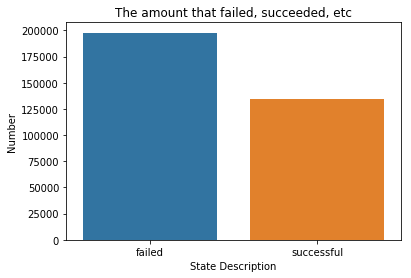

In [13]:
ax1 = sns.countplot(x = "state", data=kstart);
ax1.set_title("The amount that failed, succeeded, etc");
ax1.set_xlabel("State Description")
ax1.set_ylabel("Number");

In [14]:
percentages = round(kstart["state"].value_counts() / len(kstart["state"]) * 100, 2)
print("The number that failed, succeeded is (in %): ")
print(percentages)

The number that failed, succeeded is (in %): 
failed        59.61
successful    40.39
Name: state, dtype: float64


Generally, there are more failures than successes. That is expected, can't have every project succeed. Let's go ahead and break this down by country now.

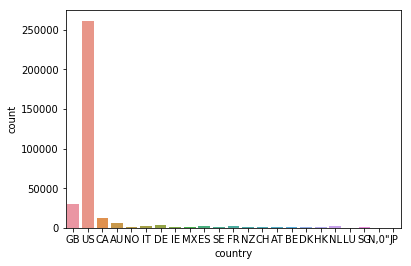

In [15]:
ax2 = sns.countplot(x="country", data = kstart)

A lot of countries so lets look at just the top 5. We want a large sample size for accuracy.

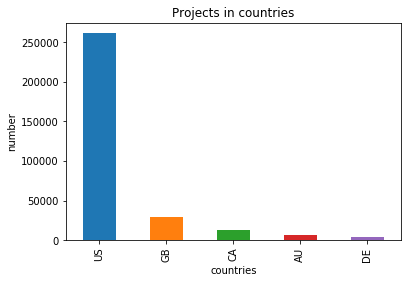

In [16]:
countries = kstart.country.value_counts()
top5 = countries.head();
top5plot = top5.plot(kind="bar");
top5plot.set(xlabel="countries", ylabel="number", title="Projects in countries");

US has by far the most projects. The next few are Great Britain, Canada, Australia and Germany. Let's look at the failure and success rates in these countries

In [17]:
us = kstart[kstart.country == "US"]
uspercentages = round(us["state"].value_counts() / len(us["state"]) * 100, 2)
print("The number that failed, succeeded, etc in US is (in %): ")
print(uspercentages)

print("\n")

gb = kstart[kstart.country == "GB"]
gbpercentages = round(gb["state"].value_counts() / len(gb["state"]) * 100, 2)
print("The number that failed, succeeded, etc in GB is (in %): ")
print(gbpercentages)

print("\n")


ca = kstart[kstart.country == "CA"]
capercentages = round(ca["state"].value_counts() / len(ca["state"]) * 100, 2)
print("The number that failed, succeeded, etc in CA is (in %): ")
print(capercentages)

print("\n")


de = kstart[kstart.country == "DE"]
depercentages = round(de["state"].value_counts() / len(de["state"]) * 100, 2)
print("The number that failed, succeeded, etc in DE is (in %): ")
print(depercentages)

print("\n")


au = kstart[kstart.country == "AU"]
aupercentages = round(au["state"].value_counts() / len(au["state"]) * 100, 2)
print("The number that failed, succeeded, etc in AU is (in %): ")
print(aupercentages)

The number that failed, succeeded, etc in US is (in %): 
failed        58.18
successful    41.82
Name: state, dtype: float64


The number that failed, succeeded, etc in GB is (in %): 
failed        59.03
successful    40.97
Name: state, dtype: float64


The number that failed, succeeded, etc in CA is (in %): 
failed        66.58
successful    33.42
Name: state, dtype: float64


The number that failed, succeeded, etc in DE is (in %): 
failed        72.73
successful    27.27
Name: state, dtype: float64


The number that failed, succeeded, etc in AU is (in %): 
failed        69.62
successful    30.38
Name: state, dtype: float64


US has the highest success rate and GB comes close so we are going to look at these two from now on. The others are way behind in terms of success rates. Also not as large of sample sizes.

In [18]:
us = us[us.state == "successful"]
gb = gb[gb.state == "successful"]

Now we are only going to look at the succesful projects. What works and doesn't work inside these countries? Where should we focus our energies the most? How long should the project be?

31.392107887537854

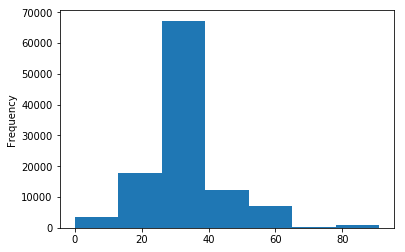

In [19]:
usgrouped = us.groupby(["Length"]).count()
us.Length.plot(kind="hist", bins=7)
us.Length.mean()

As we can see, there is a high amount of frequency in the 35-40 length range. This will most likely be the optimal time to have a Kickstarter campaign run for in the US. In fact the average is 31 days.

29.212894671417917

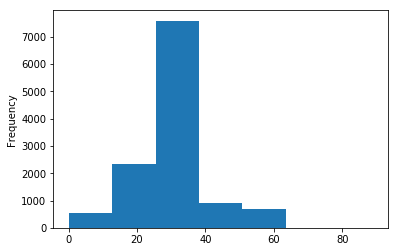

In [20]:
gbgrouped = gb.groupby(["Length"]).count()
gb.Length.plot(kind="hist", bins=7)
gb.Length.mean()

Whereas in GB, the average amount of days is 30 for a succesful campaign. Not a very large difference between the two.

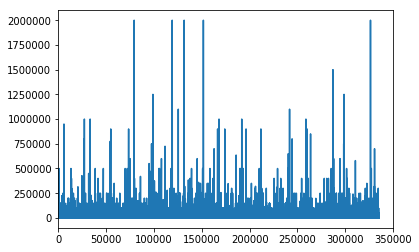

In [21]:
us.goal.plot(kind="line", xlim= (0,350000))

In [22]:
us.describe()

,goal,Length
count,1.092990e+05,109299.000000
mean,9.695671e+03,31.392108
std,2.879007e+04,12.033229
min,1.000000e-02,0.000000
25%,1.500000e+03,29.000000
50%,4.000000e+03,29.000000
75%,1.000000e+04,34.000000
max,2.000000e+06,91.000000


In [23]:
gb.describe()

,goal,Length
count,1.206700e+04,12067.000000
mean,5.535576e+03,29.212895
std,1.847438e+04,10.410775
min,1.000000e+00,0.000000
25%,5.000000e+02,26.000000
50%,1.750000e+03,29.000000
75%,5.000000e+03,30.000000
max,1.250000e+06,89.000000


It doesn't make much sense looking at the goal amount for either US or GB because the standard deviation is so large. It would be hard to pin-point exactly where. Therefore, it is important to focus on other factors instead.


In [31]:
us = us[(us.Length >= 35) & (us.Length <= 40)]

In [32]:
gb = gb[(gb.Length >= 35) & (gb.Length <= 40)]

Here, I've narrowed the US and GB datasets to length between 35 and 40 because that is where most of the successful projects occured between. We are looking for the highest chance of success so it is entirely possible to do so outside of this range, but most of the frequency occurs between this range for both countries. 

As a sanity check, I have checked the Kickerstart FAQ on the website and the recommended range is 30-35 days. Therefore, we are somewhat close and ours is solely focused on US and GB so a little variation is possibe.

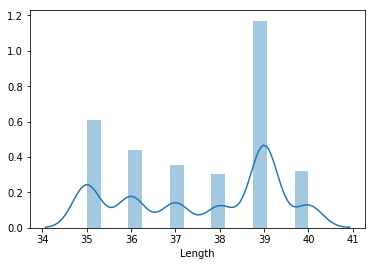

In [43]:
sns.distplot(us.Length)

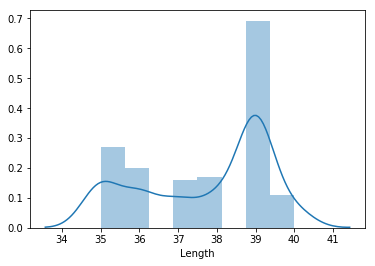

In [44]:
sns.distplot(gb.Length)

Text(0.5,1,'Main Categories in US')

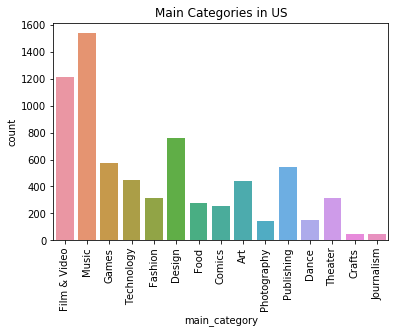

In [33]:
us_cat = sns.countplot(x = "main_category", data=us)
us_cat.set_xticklabels(us_cat.get_xticklabels(), rotation=90);
us_cat.set_title("Main Categories in US")

Text(0.5,1,'Main Categories in GB')

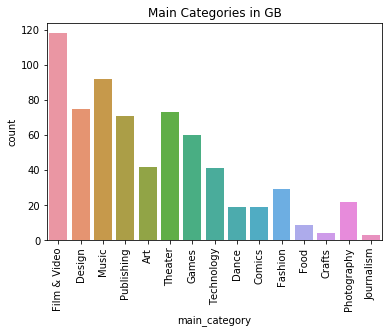

In [34]:
gb_cat = sns.countplot(x = "main_category", data=gb)
gb_cat.set_xticklabels(gb_cat.get_xticklabels(), rotation=90);
gb_cat.set_title("Main Categories in GB")

Film and music are by far the top main categories in either of these countries. Jounarlism, crafts, photography are seriously lacking in terms of success.

In [45]:
us_catnarrow = us[(us.main_category == "Film & Video") | (us.main_category == "Music")]

In [46]:
gb_catnarrow = gb[(gb.main_category == "Film & Video") | (gb.main_category == "Music")]

Going to look closer at the specific categories now after we have narrowed down the main categories to just two.

Text(0.5,1,'Categories in US')

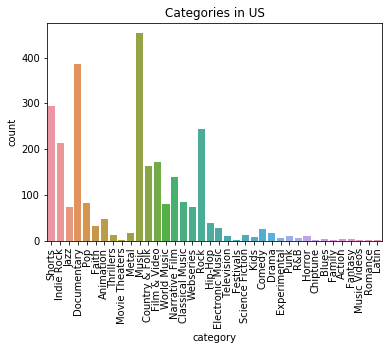

In [47]:
us_catnarrow = sns.countplot(x = "category", data=us_catnarrow)
us_catnarrow.set_xticklabels(us_catnarrow.get_xticklabels(), rotation=90);
us_catnarrow.set_title("Categories in US")

Text(0.5,1,'Categories in GB')

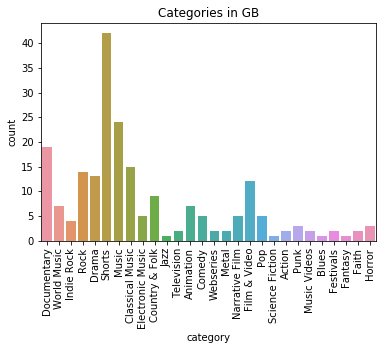

In [48]:
gb_catnarrow = sns.countplot(x = "category", data=gb_catnarrow)
gb_catnarrow.set_xticklabels(gb_catnarrow.get_xticklabels(), rotation=90);
gb_catnarrow.set_title("Categories in GB")

Music, documentary, shorts are the top three in each country.

## If you want a kickstarter campaign to do well, it certainly helps if you are located in the US or GB. Next, you will want to focus on mainly the music, shorts and documentary areas because that is where the most successful campaigns have been. Moreover, many people assume that longer or shorter campaigns are better for individual reasons, but the data shows that you should aim for 35-40 days for a higher chance of a succesful campaign. The goal of the campaign does not matter at all. It varies from project to project.

## Nonetheless, these factors are not very meaningful. If you want to succeed, you should focus on building a product that offers a value proposition for customers in a cost-efficient way. Also, marketing and pricing play majors roles as well. This was just a way to use the python skills I have learned thorugh practice.